# What is image in terms of numbers?
let's find out

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score
import seaborn as sns

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Shape of x_train: (60000, 28, 28)
Data type of x_train: uint8
Minimum pixel value: 0
Maximum pixel value: 255


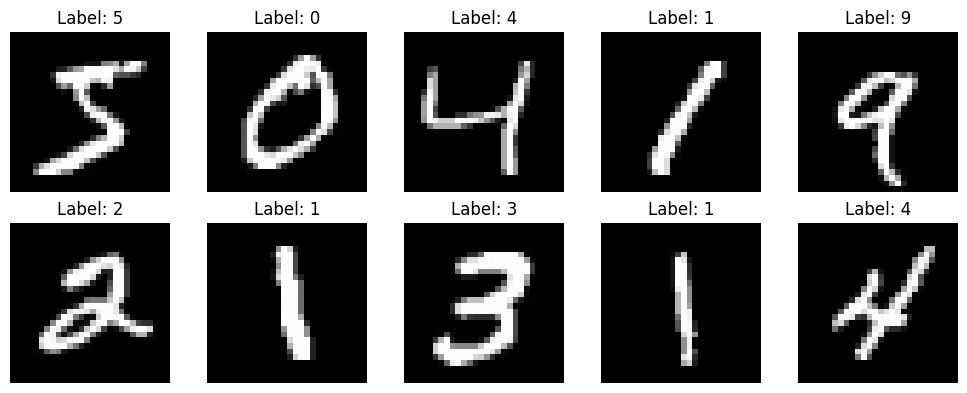

In [ ]:
# Check the shape of x_train
print("Shape of x_train:", x_train.shape)

# Check the data type of x_train
print("Data type of x_train:", x_train.dtype)

# Check the minimum and maximum pixel values
print("Minimum pixel value:", np.min(x_train))
print("Maximum pixel value:", np.max(x_train))

# Plot a few sample images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title("Label: {}".format(y_train[i]))
    plt.axis('off')
plt.tight_layout()
plt.show()


Shape of y_train: (60000,)
Label counts: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


Text(0.5, 1.0, 'Distribution of Labels')

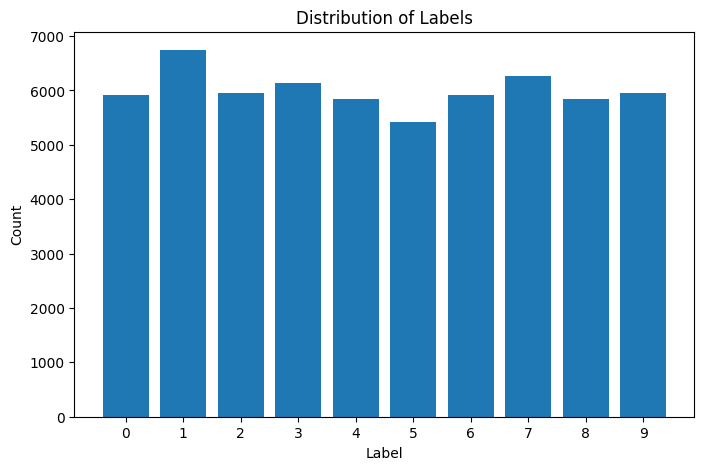

In [ ]:
# Check the shape of y_train
print("Shape of y_train:", y_train.shape)

# Count the occurrences of each label
label_counts = np.bincount(y_train)
print("Label counts:", label_counts)

# Plot the distribution of labels
plt.figure(figsize=(8, 5))
plt.bar(range(10), label_counts)
plt.xticks(range(10))
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels")

In [ ]:
# Normalize the pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the input data to 2D (flatten the images)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
# Create and train the Logistic Regression model
logreg = LogisticRegression(max_iter=100)
logreg.fit(x_train, y_train)

# Make predictions on the test data
y_pred_logreg = logreg.predict(x_test)

# Calculate accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

# Calculate confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

Logistic Regression Accuracy: 0.9258


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Confusion matrix on Logistic Regression')

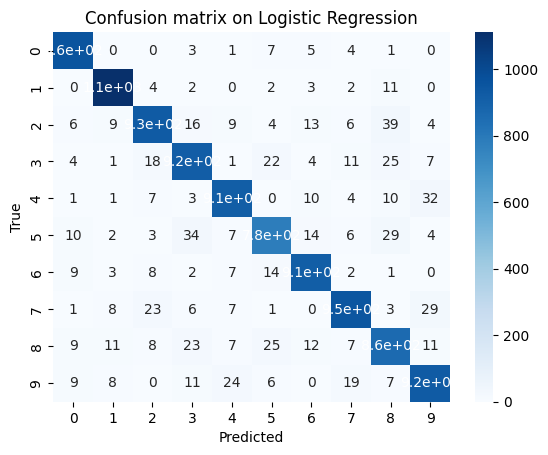

In [ ]:
sns.heatmap(cm_logreg, annot=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix on Logistic Regression")

In [ ]:
f1_score(y_test, y_pred_logreg, average = 'weighted')

0.925665093257043

In [ ]:
precision_score(y_test, y_pred_logreg, average='weighted')

0.9257149642349097

In [ ]:
# Create and train the SVC model
svc = SVC(max_iter=100)
svc.fit(x_train, y_train)

# Make predictions on the test data
y_pred_svc = svc.predict(x_test)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVC Accuracy:", accuracy_svc)

# Calculate confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC Accuracy: 0.9271


Text(0.5, 1.0, 'Confusion matrix on Support Vector Classifier')

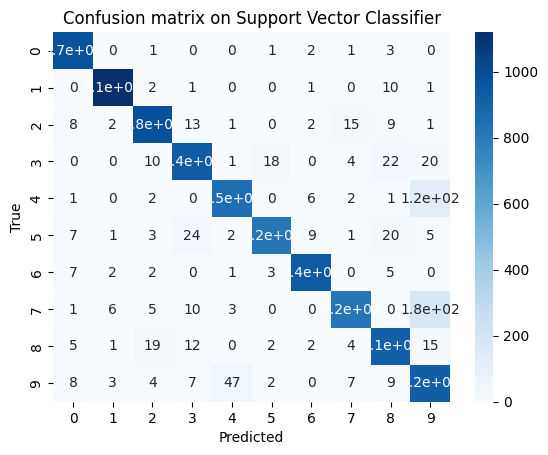

In [ ]:
sns.heatmap(cm_svc, annot=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix on Support Vector Classifier")

In [ ]:
f1_score(y_test, y_pred_svc, average = 'weighted')

0.9279876927429977

In [ ]:
precision_score(y_test, y_pred_svc, average='weighted')

0.9330550822681989

# problems:
1. Time consumption
2. Not highly accurate
3. Not highly precise

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/2
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2382 - accuracy: 0.9296 - val_loss: 0.1204 - val_accuracy: 0.9616
Epoch 2/2
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1024 - accuracy: 0.9693 - val_loss: 0.1094 - val_accuracy: 0.9662


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
y_pred_nn = model.predict(x_test)

f1_score_nn = f1_score(y_test, np.argmax(y_pred_nn,axis=1), average='weighted')
precision = precision_score(y_test, np.argmax(y_pred_nn,axis=1), average='weighted')
# Print the results
print("NN Loss:", test_loss)
print("NN Accuracy:", test_acc)
print("NN F1 Score:", f1_score_nn)
print("NN Precision:", precision)

313/313 [==============================] - 1s 2ms/step
NN Loss: 0.10937309265136719
NN Accuracy: 0.9661999940872192
NN F1 Score: 0.9663088610148297
NN Precision: 0.9671796758913435


In [ ]:
confusion_nn = confusion_matrix(y_test, np.argmax(y_pred_nn,axis=1))

Text(0.5, 1.0, 'Confusion matrix on Neural Network')

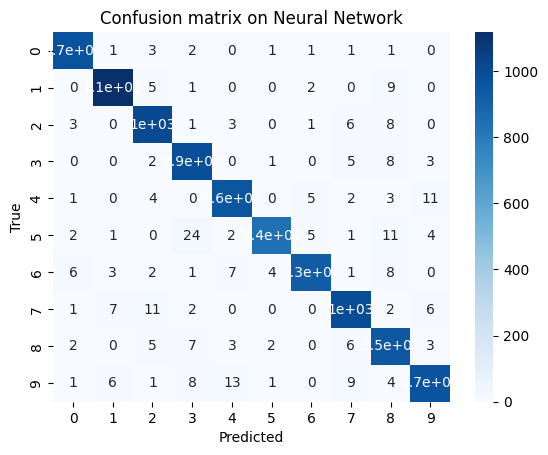

In [ ]:
sns.heatmap(confusion_nn, annot=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix on Neural Network")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


# Testing individual examples

In [ ]:
predictions = model.predict(x_test[:1])
prediction_number = tf.argmax(predictions, axis=1)
print('Predictions:', prediction_number)

1/1 [==============================] - 0s 33ms/step
Predictions: tf.Tensor([7], shape=(1,), dtype=int64)


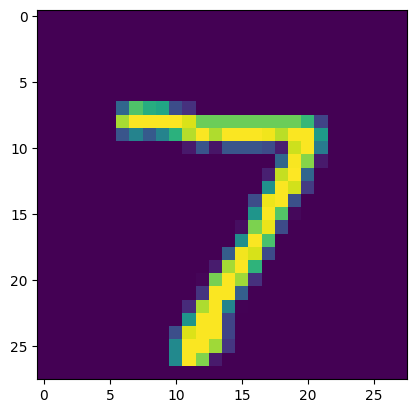

In [ ]:
plt.imshow(x_test[0].reshape(28,28))

In [ ]:
y_train[0]

5

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
x_train_cnn = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test_cnn = x_test.reshape((x_test.shape[0], 28, 28, 1))
# Convert the target labels to categorical
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

In [ ]:
# Create the CNN model
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), 
                     activation='relu', 
                     input_shape=(28, 28, 1)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

# Compile the model
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
model_cnn.fit(x_train_cnn, 
              y_train_cnn, 
              epochs=2, 
              batch_size=32, 
              validation_data=(x_test_cnn, y_test_cnn))

# Evaluate the model
loss_cnn, accuracy_cnn = model_cnn.evaluate(x_test_cnn, y_test_cnn)
y_pred_cnn = tf.argmax(model_cnn.predict(x_test_cnn), axis=1)

# Calculate F1 score and precision
f1_score_cnn = f1_score(y_test, y_pred_cnn, average='weighted')
precision_cnn = precision_score(y_test, y_pred_cnn, average='weighted')

# Print the results
print("CNN Loss:", loss_cnn)
print("CNN Accuracy:", accuracy_cnn)
print("CNN F1 Score:", f1_score_cnn)
print("CNN Precision:", precision_cnn)

# Calculate confusion matrix
cm_cnn = confusion_matrix(y_test, y_pred_cnn)

Epoch 1/2
1875/1875 [==============================] - 76s 39ms/step - loss: 0.1464 - accuracy: 0.9555 - val_loss: 0.0609 - val_accuracy: 0.9804
Epoch 2/2
313/313 [==============================] - 3s 9ms/step
CNN Loss: 0.03719909116625786
CNN Accuracy: 0.9876000285148621
CNN F1 Score: 0.9876054434439957
CNN Precision: 0.9877133183099864


Text(0.5, 1.0, 'Confusion matrix on Convolutional Neural Network')

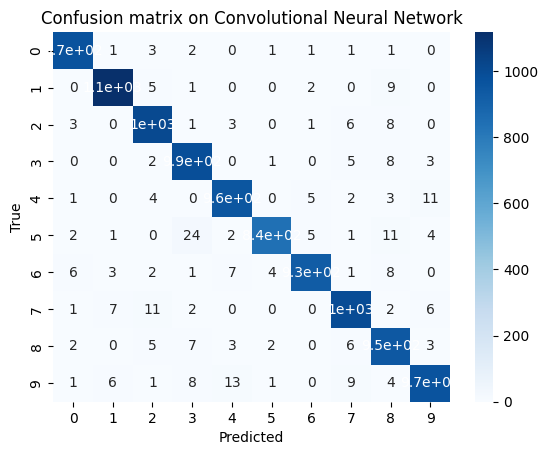

In [ ]:
sns.heatmap(confusion_nn, annot=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix on Convolutional Neural Network")